## <center>Algorithme du back propagation</center>
Soit le réseau de neurone suivant:


$$x\rightarrow W^{1}\rightarrow Z^{1}\rightarrow A^{1}\rightarrow ... W^{k}\rightarrow W^{k}\rightarrow Z^{k}\rightarrow A^{k}$$

1. pour un exemple (x,y) donné, en calcule la sortie $A_{k}$

$$Z_{1}=W_{1}.x $$

$$A_{1}=f(Z_{1}) $$

$$Z_{2}=W_{2}.A_{1} $$

$$A_{2}=f(Z_{2}) $$

$$ ... $$

$$Z_{k}=W_{k}.A_{k-1} $$
$$A_{k}=f(Z_{k}) $$

2. On calcule l'erreur à la sortie k
$$\delta_{k}=y_{k}-a_{k}$$



3. Mise à jour des poids $W_{jk}$ entre le neurone j de la couche cachée et le neurone k de la couche de sortie

$$\Delta W_{jk}=\delta_{k}a_{k}(1-a_{k})a_{j}$$

<center> $a_{k}(1-a_{k})$ la dérivé de la sigmoid en $z_{k}$ </center>

$$W_{jk}=W_{jk} + \alpha\Delta W_{jk}$$

4. On calcule l'erreur dans la chouche j=k-1
$$\delta_{j}=\sum_{k}W_{jk}\delta_{k}$$

3. Mise à jour des poids $W_{ij}$ entre le neurone i de la couche cachée (d'entrée) et le neurone j de la couche cachée

$$\Delta W_{ij}= \delta_{j}(1-a_{j})a_{j}a_{i}$$
$$W_{jk}=W_{ij} + \alpha\Delta W_{ij}$$

$$\delta^{s}=y-a^{s}$$
$$\delta^{i}=W^{i+1}\delta^{i+1}$$
$$\Delta W^{i}=\delta^{i}\frac{\delta f(z^{i})}{\delta z}a^{i-1}$$
$$W^{i}=W^{i}+\alpha \Delta W^{i}$$

### Q1 Créer une class MLPClassifier pour un perceptron multicouche 

[[0.29157164 0.54352508 0.83704095]
 [0.22307389 0.6573879  0.38553835]]
[[0.94661195 0.15226692]
 [0.37406254 0.32891979]
 [0.34715209 0.19844455]]
[0.75918154 0.62279799]


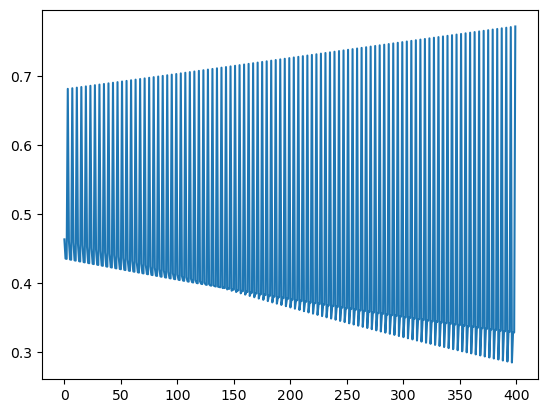

In [67]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))
def dsigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

class MLPClassifier:
    def __init__(self, layers, act,dact):
        self.input_size=layers[0]
        self.hidden_size=layers[1]
        self.out_size=layers[2]
        self.alph=0.001
        self.act=act
        self.dact=dact
        #initialiser les poids de ce reseau
        self.w1=np.random.rand(self.input_size,self.hidden_size)
        self.w2=np.random.rand(self.hidden_size,self.out_size)
        
    def feedforward(self,X):
        X=np.array(X).T
        #calculer la sortie de ce réseau pour une ensemble d'entrées X=[[...],[.....],[....]]
        Z1=self.w1.T.dot(X)
        a1=self.act(Z1)
        Z2=self.w2.T.dot(a1)
        a2=self.act(Z2)
        return a2
    
    def fit(self,X,Y,alpha,max_iter):
        self.alpha=alpha
        #implementer l'algorithme de la rétropropagation de l'erreur
        J=[]
        for i in range(max_iter):
            for x,y in zip(X,Y):
                Z1=self.w1.T.dot(x)
                a1=self.act(Z1)
                Z2=self.w2.T.dot(a1)
                a2=self.act(Z2)
                j=(y-a2).dot((y-a2))
                J.append(j)
                
                delta2=y-a2
                delta1=self.w2.dot(delta2)
                
                #dw2=delta2*a2*(1-a2)*a1
                #dw1=delta1*a1*(1-a1)*x
                #f=self.dact(Z2)*a1
               # print(f.shape,delta2.shape)
                dw2=np.matmul((delta2*self.dact(Z2)).reshape(len(Z2),1),a1.reshape(1,len(a1)))
                dw1=np.matmul((delta1*self.dact(Z1)).reshape(len(Z1),1),x.reshape(1,len(x)))
                
                self.w1+=alpha*dw1.T
                self.w2+=alpha*dw2.T
                
                #print(delta1.shape,delta2.shape)
                
        #print(J)
        return self.w1 , self.w2, J
        
    def getW(self):
        return (self.w1, self.w2)

m=MLPClassifier((2,3,2),sigmoid,dsigmoid)
print(m.getW()[0])
print(m.getW()[1])
out=m.feedforward([1,1])
print(out)
w1, w2, J=m.fit(np.array([[2,5],[0.2,0.5],[.2,.5],[0.2,0.5]]),np.array([[1,0],[1,0],[1,0],[0,1]]),0.01,100)
plt.plot(J)

### Q2. En utilisant la fonction make_classification de sklearn.datasets, générer un dataset de 100 exemples $\in \R^{2}$ appartenant à 3 classes {0, 1, 2}

In [84]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


#générer le dataset
X,Y=make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, random_state=1)
Y1=np.zeros((len(Y),3))
Y1[Y==0]=[1,0,0]
Y1[Y==1]=[0,1,0]
Y1[Y==2]=[0,0,1]
Y=Y1
"print(Y)
#afficher ce dataset dans un scatter plot

X_train,   X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=1)

#Utiliser la méthode train_test_split pour deviser ce dataset en: 80% pour l'entrainement et 20% pour test




#Créer une instance de MLPClassifier pour ce prolème de classification

m=MLPClassifier((2,10,3),sigmoid,dsigmoid)
w1, w2, J=m.fit(X_train,Y_train,0.01,1000)
#plt.plot(J)


#Entrainer ce modèle sur les données d'entrainement


out=m.feedforward(X_test)

#Tester ce modèle avec les données de teste


#classification_report(Y_test,out)

#Utiliser la méthode classification_report pour voir les performance de ce modèle




#Augmenter/deminuer la taille de la couche caché et comparer les performance avec le premier modèle.



#Que remarqez vous

In [95]:
out=m.feedforward(X_test).T

print(out.shape)
print(Y_test.shape)
o=np.argmax(out,axis=1)
y=np.argmax(Y_test,axis=1)
print(classification_report(y.T,o.T))

(20, 3)
(20, 3)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.96      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20



## Q3 utilisation la classe MLPClassifier sklearn.neural_network

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#Créer une instance de MLPClassifier pour ce prolème de classification

mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic',max_iter=2000,learning_rate_init=0.01 )
mlp=mlp.fit(X_train,Y_train)
o=mlp.predict(X_test)
o=np.argmax(o,axis=1)
y=np.argmax(Y_test,axis=1)
print(classification_report(y,o))

              precision    recall  f1-score   support

           0       0.12      1.00      0.21        23
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        19

    accuracy                           0.12       200
   macro avg       0.01      0.10      0.02       200
weighted avg       0.01      0.12      0.02       200



/home/idsd/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/idsd/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/idsd/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.96      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20



## Q4 Appliquer ce modèle pour la classification des images
https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

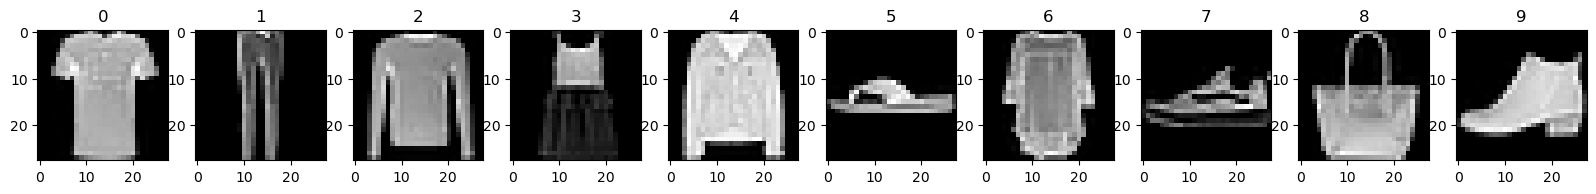

In [43]:
df=pd.read_csv('fashion-mnist_train.csv')
tdf=pd.read_csv('fashion-mnist_test.csv')

ndf=df.sort_values(by=['label']).drop_duplicates(['label'])
plt.figure(figsize=(20,20))
lb=[]
for i in range(10):
    img=ndf.iloc[i,1:].values.reshape(28,-1)
    lb+=[img]
    plt.subplot(10,10,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(i)
plt.show()
#plt.imshow(df.iloc[0,1:].values.reshape(28,-1),cmap='gray')

In [84]:
X_train=np.array(df.iloc[:,1:])[:1000,:]
Y_train=np.array(pd.get_dummies(df.iloc[:,0]))[:1000,:]

X_test=np.array(tdf.iloc[:,1:])[:200,:]
Y_test=np.array(pd.get_dummies(tdf.iloc[:,0]))[:200,:]

print(X_train)
print(Y_train)
print(X_test)
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 3 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 3 0]
 [0 0 0 ... 0 0 0]]


In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#Créer une instance de MLPClassifier pour ce prolème de classification

mlp=MLPClassifier(hidden_layer_sizes=(600,300,), activation='logistic',max_iter=2500,learning_rate_init=0.001 )
mlp=mlp.fit(X_train,Y_train)
o=mlp.predict(X_test)
o=np.argmax(o,axis=1)
y=np.argmax(Y_test,axis=1)
print(classification_report(y,o))

              precision    recall  f1-score   support

           0       0.26      0.96      0.41        23
           1       1.00      0.94      0.97        17
           2       1.00      0.08      0.15        25
           3       0.88      0.92      0.90        25
           4       0.62      0.34      0.44        29
           5       1.00      0.81      0.90        16
           6       0.50      0.06      0.11        16
           7       0.93      0.82      0.87        17
           8       1.00      0.54      0.70        13
           9       0.95      0.95      0.95        19

    accuracy                           0.63       200
   macro avg       0.82      0.64      0.64       200
weighted avg       0.80      0.63      0.62       200



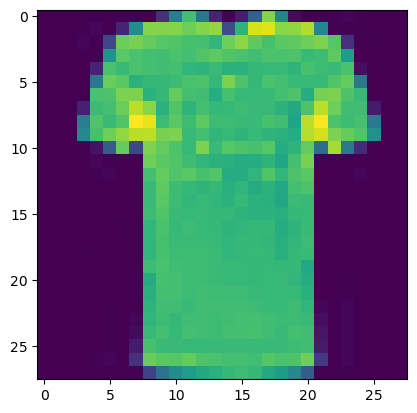

In [121]:
out=mlp.predict(df.iloc[10,1:].values.reshape(1,-1))
i=np.where(out==1)[1][0]

plt.imshow(lb[i])

In [49]:
df.iloc[:,0]

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

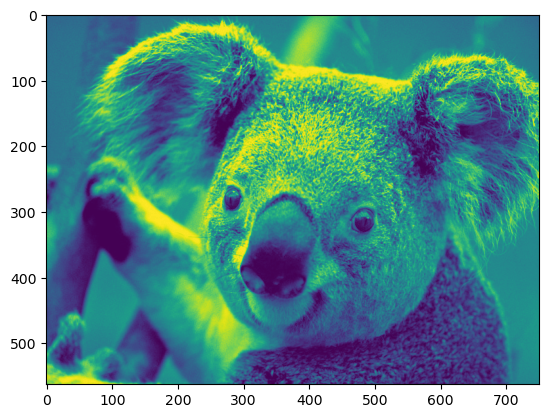

In [139]:
import matplotlib.image as mtg
img=mtg.imread('koala.jpg')
plt.imshow(np.average(img,axis=2))
#np.average(img,axis=2)